In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
TEST_PATH = '../data/milan_processed_test.npz'
RESULTS_PATH = '/home/nick/Desktop/experiments_results/'
deep_conv_lstm = 'new_conv_lstm_lr_-3_in12_out10_no_shuffle_before_split/'
shallow_conv_lstm = 'conv_lstm_lr_-3_in12_out10_no_shuffle_before_split/'
PREDICTIONS_PATH = 'example_predictions/test_predictions.npz'
x = np.load(TEST_PATH)['x']
y = np.load(TEST_PATH)['y']
pred_deep = np.load(RESULTS_PATH+deep_conv_lstm+PREDICTIONS_PATH)['y']
pred_shallow = np.load(RESULTS_PATH+shallow_conv_lstm+PREDICTIONS_PATH)['y']

In [3]:
pred_deep = pred_deep.transpose(0,1,3,4,2)
pred_deep = pred_deep.reshape([-1,100,100,10])

pred_shallow = pred_shallow.transpose(0,1,3,4,2)
pred_shallow = pred_shallow.reshape([-1,100,100,10])

In [4]:
MSE_deep = ((y - pred_deep)**2).sum(axis = (1,2)).mean()
MSE_shallow = ((y - pred_shallow)**2).sum(axis = (1,2)).mean()

In [5]:
print(MSE_deep)
print(MSE_shallow)

360.7426764464058
1196.6475415778687


In [6]:
def plot_single_prediction_example_on_cell_50_50(index):
    x_axis = np.arange(10)
    plt.plot(x_axis,y[index,50,50,:],'b-o',label='ground_truth')
    plt.plot(x_axis,pred_shallow[index,50,50,:],'r-o',label='shallow')
    plt.plot(x_axis,pred_deep[index,50,50,:],'k-o',label='deep')
    plt.legend()

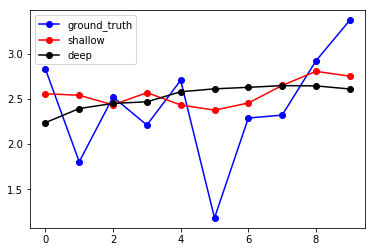

In [8]:
plot_single_prediction_example_on_cell_50_50(89)

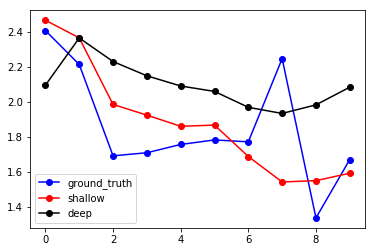

In [10]:
plot_single_prediction_example_on_cell_50_50(140)

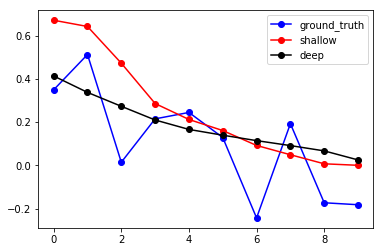

In [11]:
plot_single_prediction_example_on_cell_50_50(180)

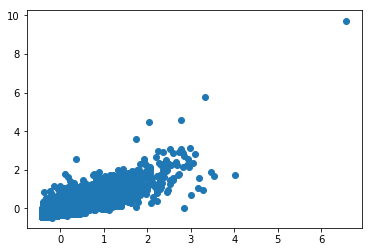

In [29]:
plt.scatter(y[51,:].flatten(),pred_deep[51,:].flatten())

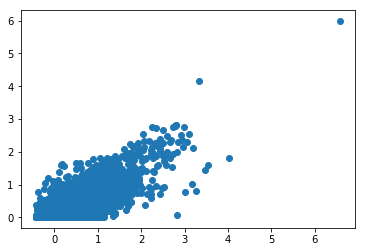

In [28]:
plt.scatter(y[51,:].flatten(),pred_shallow[51,:].flatten())